## Average Glove Embeddings

**Nov 17, 2019**

---

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import csv
import math
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import constants
from src.models.avg_embeddings_model import AvgEmbeddings
import matplotlib.pyplot as plt
import time

In [2]:
article_summary = pd.read_csv(f'{constants.CLEAN_DIR}/{constants.Text_Prefix}summary.csv')
image_summary =  pd.read_csv(f'{constants.CLEAN_DIR}/{constants.Media_Prefix}summary.csv')
preview_dir = f'{constants.DATA_DIR}/preview'

D = 300
embed_model = AvgEmbeddings(D)

Cambodia fines waste importer, sets deadline for its return

Top 6 matching articles
Cambodia says plastic waste shipments came from US, Canada
Trump says tariffs on China could stay to ensure compliance
US plans to hike tariffs Friday, says China broke promises
Malaysia to send back plastic waste to foreign nations
The Latest: Envoy says Iran could soon exceed uranium limits
UN calls for Yemen agreement to be implemented without delay

total prediction time 0.23s


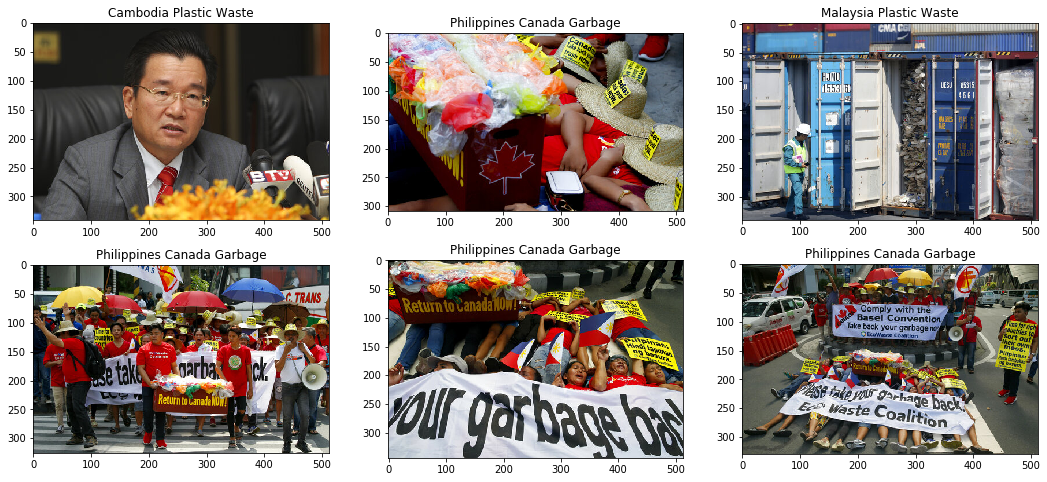

In [3]:
start_time = time.time()
random_ind = np.random.randint(0, len(article_summary))
random_headline = article_summary.iloc[random_ind].headline

print(random_headline + '\n')
k = 6

top_k_articles = embed_model.predict_articles(random_headline, random_ind, k=6)

print(f'Top {k} matching articles')
for art_id in top_k_articles:
    print(article_summary[article_summary['id'] == art_id].headline.values[0])

top_k_images = embed_model.predict_images(random_headline, k=6)

rows = math.ceil(k/3)
cols = 3
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(6*cols,4*rows))
ax = ax.ravel()

for i, img_id in enumerate(top_k_images):
    img_file = plt.imread(f'{preview_dir}/{img_id}.jpg')
    title = image_summary[image_summary['id'] == img_id].title.values[0]
    ax[i].imshow(img_file)
    ax[i].set_title(title)
    
print(f'\ntotal prediction time {time.time() - start_time:.2f}s')

---